In [11]:
import numpy as np 
import pandas as pd 
from numpy import array
from numpy import argmax

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df1 = pd.read_csv(r'C:\Users\Admin\Autism_Data_Adolescent_Manual_Weka_Attrconverted.csv',na_values='?')

In [12]:
#process only top 5 from chi2 with individual features
data= pd.concat([df1['A3'],df1['A6'],df1['A4'],df1['A5'],df1['A7'],df1['Age'],df1['Sex'],df1['Ethnicity'],df1['Jaundice'],df1['Family_ASD'],df1['Class']],axis=1)
data.columns=['A3','A6','A4','A5','A7','Age','Sex','Ethnicity','Jaundice','Family_ASD','ASD_class']
data.head()

,A3,A6,A4,A5,A7,Age,Sex,Ethnicity,Jaundice,Family_ASD,ASD_class
0,0,0,1,0,1,15,0,0,0,0,NO
1,1,1,1,0,1,15,0,1,0,0,NO
2,1,1,0,1,1,15,1,1,0,1,YES
3,1,1,1,1,1,16,1,2,0,0,YES
4,1,1,1,1,1,15,1,3,0,0,YES


In [47]:
#method 1: logistic regression

from sklearn.model_selection import train_test_split
X= data.iloc[:,:-1]
y= data.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001,0.01,0.1,1,10,100,1000,10000]}
grid_log = GridSearchCV(LogisticRegression(),param_grid,scoring='accuracy',refit=True,cv=None)

grid_log.fit(X_train,y_train)

best_parameters = grid_log.best_params_
print(best_parameters)

grid_log.best_estimator_

{'C': 0.001}


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
y_test

55      NO
245    YES
98      NO
150    YES
89      NO
90     YES
160    YES
208    YES
142     NO
177     NO
196     NO
88      NO
32      NO
41      NO
222     NO
109    YES
236    YES
125    YES
219     NO
4      YES
193    YES
80     YES
118     NO
218     NO
148     NO
69     YES
93      NO
175    YES
134     NO
78     YES
213    YES
158    YES
112    YES
147    YES
34      NO
96     YES
154    YES
37      NO
215     NO
15      NO
12      NO
104     NO
161    YES
108     NO
31      NO
200     NO
35      NO
48      NO
85      NO
207    YES
Name: ASD_class, dtype: object

In [50]:
X_test

array([[-1.227326  ,  0.73950997, -1.32287566,  0.6751906 , -0.91287093,
        -0.72011669,  0.95070824,  0.7537137 , -0.40583972, -0.47938884],
       [ 0.81477945,  0.73950997,  0.75592895,  0.6751906 ,  1.09544512,
        -0.72011669, -1.05184741,  0.7537137 , -0.40583972, -0.47938884],
       [ 0.81477945,  0.73950997,  0.75592895, -1.48106326, -0.91287093,
        -0.72011669, -1.05184741, -1.64043571, -0.40583972, -0.47938884],
       [ 0.81477945,  0.73950997,  0.75592895,  0.6751906 , -0.91287093,
        -1.38952094, -1.05184741, -1.64043571,  2.4640269 ,  2.0859893 ],
       [ 0.81477945, -1.35224681, -1.32287566,  0.6751906 , -0.91287093,
         0.6186918 , -1.05184741, -0.8423859 , -0.40583972, -0.47938884],
       [ 0.81477945,  0.73950997,  0.75592895,  0.6751906 ,  1.09544512,
         0.6186918 ,  0.95070824,  0.7537137 , -0.40583972, -0.47938884],
       [ 0.81477945,  0.73950997,  0.75592895,  0.6751906 , -0.91287093,
         1.28809605, -1.05184741, -1.64043571

[[23  5]
 [ 0 22]]
             precision    recall  f1-score   support

         NO       1.00      0.82      0.90        28
        YES       0.81      1.00      0.90        22

avg / total       0.92      0.90      0.90        50

Accuracy: 0.9


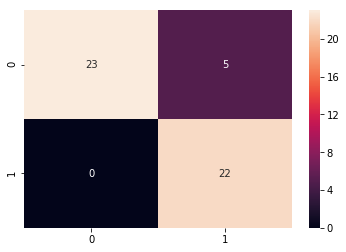

In [51]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

pred_log=grid_log.predict(X_test)

print(confusion_matrix(y_test,pred_log))
print(classification_report(y_test,pred_log))

cm = confusion_matrix(y_test, pred_log)

import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

acc = accuracy_score(y_test, pred_log)
print("Accuracy: "+ str(acc))


In [52]:
pred_log

array(['NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES'],
      dtype=object)